In [21]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [22]:
#Loading numpy data
data=np.load('./data/normalized_data.npz')

In [23]:
data.files

['arr_0', 'arr_1']

In [24]:
x=data['arr_0']
y=data['arr_1']

In [25]:
x.shape,y.shape

((5468, 10000), (5468,))

## Creating Eigen Images

In [26]:
x1=x-x.mean(axis=0)

In [27]:
from sklearn.decomposition import PCA

In [28]:
p=PCA(n_components=None,whiten=True,svd_solver='auto')

In [29]:
x_p=p.fit_transform(x1)

In [30]:
x_p.shape

(5468, 5468)

In [31]:
eigen_ratio=p.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

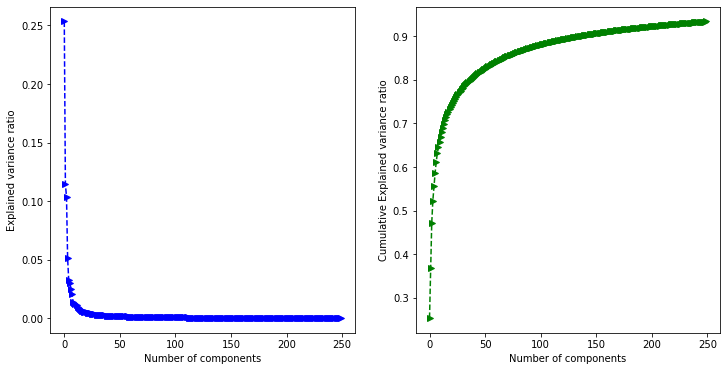

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:250],'b>--')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:250],'g>--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance ratio')
plt.show()

#### Therefore using elbow method we draw conclusion that if we just consider only 25-30 components only than the  cummulative explained variance is approx. 75%. Therefore to achieve variance of more than 80% we consider 50 components

In [33]:
p_50=PCA(n_components=50,whiten=True,svd_solver='auto')
x_p_50=p_50.fit_transform(x1)

In [34]:
x_p_50.shape

(5468, 50)

In [35]:
#saving pca
pickle.dump(p_50,open('./Model/p_50.pickle','wb'))

In [36]:
#consider 50 components and inverse transform
x_p_inverse=p_50.inverse_transform(x_p_50)

In [37]:
x_p_inverse.shape

(5468, 10000)

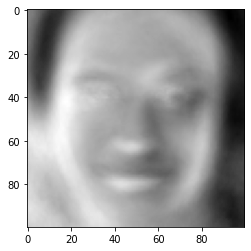

In [39]:
#consider a image
img=x_p_inverse[0,:]
img=img.reshape((100,100))
plt.imshow(img,cmap='gray')

In [40]:
#saving
np.savez('./data/pca_50_y_mean.pickle',x_p_50,y,x.mean(axis=0))